In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
data=np.load("mnist_train_small.npy")

In [3]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
data[0]

array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  59,  50,   0,
        23,   0,   0,  32, 134, 180, 254, 206,   8,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4,  96, 216, 23

In [5]:
data.shape

(19999, 785)

In [6]:
X = data[:,1:]
y = data[:,0]

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
y

array([5, 7, 9, ..., 2, 9, 5], dtype=uint8)

In [9]:
X.shape,y.shape

((19999, 784), (19999,))

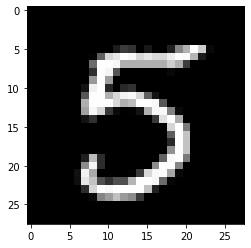

In [10]:
plt.imshow(X[0].reshape(28,28),cmap='gray')

In [11]:
y[0]

5

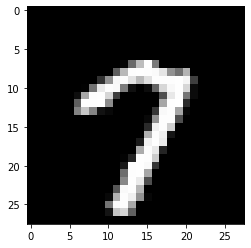

In [12]:
plt.imshow(X[555].reshape(28,28),cmap='gray')

In [13]:
y[555]

7

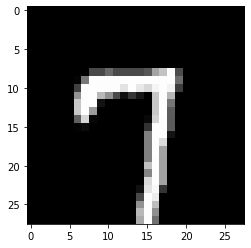

In [14]:
plt.imshow(X[564].reshape(28,28),cmap='gray')

In [15]:
y[564]

7

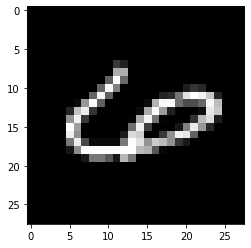

In [16]:
plt.imshow(X[33].reshape(28,28),cmap='gray')

In [17]:
y[33]

6

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train.shape,y_train.shape

((13399, 784), (13399,))

In [21]:
X_test.shape,y_test.shape

((6600, 784), (6600,))

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model= KNeighborsClassifier()

In [24]:
# training the model happens in fit function
# plotting the points on the graph
# no work is happening in training knn model
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [26]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

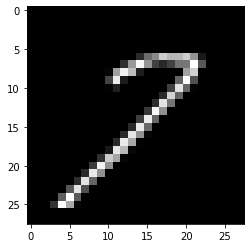

In [27]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [28]:
model.score(X_test[:100],y_test[:100])

0.95

# KNN -> k-Nearest Neighbour

In [29]:
X1 , y1 = make_blobs(n_samples=100 , centers=5 , random_state=42)

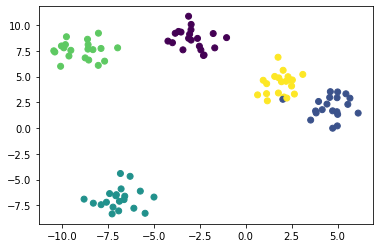

In [30]:
plt.scatter(X1[:,0],X1[:,1] , c=y1)

In [31]:
X1 , y1 = make_blobs(n_samples=100 , centers=3 , random_state=42)

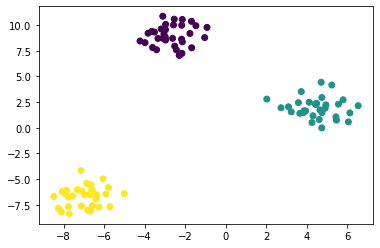

In [32]:
plt.scatter(X1[:,0],X1[:,1] , c=y1)

In [33]:
X1[:5],y1[:5]

(array([[-7.72642091, -8.39495682],
        [ 5.45339605,  0.74230537],
        [-2.97867201,  9.55684617],
        [ 6.04267315,  0.57131862],
        [-6.52183983, -6.31932507]]),
 array([2, 1, 0, 1, 2]))

# Custom KNN - Our own KNN Implementation from scratch!

In [34]:
class CustomKNN:
    
    def __init__(self,n_neighbours=5):
        self.n_neighbours = n_neighbours
    
    # training function
    def fit(self,X,y):
        self._X=X.astype(np.int64)
        self._y=y
    
    # predict point
    # given a single point, tell me which class it belongs to
    def predict_point(self,point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # These points are from my training data
        for x_point , y_point in zip(self._X,self._y):
            dist_point= ((point - x_point)**2 ).sum()
            list_dist.append([dist_point,y_point])
        
        # sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count
        items, counts = np.unique(np.array(top_k)[:,1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict 
    # give me answer for each member in the array
    def predict(self,X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self,X,y):
        return sum(self.predict(X) == y) / len(y)
        

In [35]:
m2=CustomKNN()

In [36]:
m2.fit(X_train, y_train)

In [37]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [38]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [39]:
m2.score(X_test[:100],y_test[:100])

0.95

# Done!